# Modelos de Classificação e métricas simplificado

- Em modelos de classificação estamos tentando prever o valor de uma categoria;
- Podemos utilizar de diferentes algoritmos de classificação como: Decision Treen, KNN, SVM, ...

Nesta aula foi realizado um tratamento muito básico, apenas para apresentar diferentes algoritmos de classificação e algumas métricas utilizadas em ciência de dados, sendo o tratamento algo muito básico.

In [65]:
# Importando bibliotecas
import pandas as pd

In [66]:
# Carregando o dataset
dataset = pd.read_csv("Titanic/train.csv")

In [67]:
# Eliminando a coluna cabine
dataset.drop("Cabin", axis=1, inplace=True)

In [68]:
# Visualizando os dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [69]:
# Removendo todos os valores nulos
dataset.dropna(inplace=True)

In [70]:
# Visualizando o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [71]:
# Removendo colunas com dtypes do tipo object
colunas = dataset.dtypes[dataset.dtypes == "object"].index

dataset.drop(colunas, axis=1, inplace=True)

In [72]:
# Visualizando o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.5 KB


In [73]:
# Preparação de dados
X = dataset.drop("Survived", axis=1)
y = dataset.Survived

In [74]:
# Importando o algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier

In [75]:
# Criando o classificador
KNN = KNeighborsClassifier(n_neighbors=3)


In [76]:
# Treinando
KNN.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [77]:
# Avaliando o modelo
KNN.score(X, y)

0.7907303370786517

In [78]:
# Usando outro algoritmo - Árvore de decisão
# Importando o classificador
from sklearn import tree

In [79]:
# Criando o classificado
clf = tree.DecisionTreeClassifier()

In [80]:
# Treinando o modelo
clf = clf.fit(X, y)

In [81]:
# Avaliando o modelo - O modelo decision tree tem problema de se viciar nos dados
clf.score(X, y)

1.0

In [82]:
# Usando outro algoritmo - Regressão Logística
from sklearn.linear_model import LogisticRegression


In [83]:
# Criando o clasificador e já avaliando
clflog = LogisticRegression(random_state=0, max_iter=1000).fit(X, y)

In [84]:
# Avaliando o modelo
clflog.score(X, y)

0.7064606741573034

# Avaliando os algoritmos
A avaliação apresentada até agora não pode ser usada como uma avaliação correta, pois é usado os dados de treino tanto para treinar como para testar, logo, o algoritmo pode ter apenas decorado os dados ao invés de aprender.

Para avaliar corretamente é preciso separar o conjunto de dados em dados de treino e dados de teste e usar os dados de teste para avaliar o algoritmo.

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [87]:
# Realizando predições
pred_KNN = KNN.predict(X_test)
pred_tree = clf.predict(X_test)
pred_clflog = clflog.predict(X_test)

# Matriz de confusão

Métrica de avaliação se o modelo fez uma predição corretamente

In [88]:
from sklearn.metrics import confusion_matrix

In [99]:
cf_KNN = confusion_matrix(y_test, pred_KNN)
cf_tree = confusion_matrix(y_test, pred_tree)
cf_clflog = confusion_matrix(y_test, pred_clflog)

In [100]:
# Usando biblioteca gráfica para melhorar a visualizando de cada matriz de confusão
import seaborn as sns

In [109]:
cf_KNN

array([[123,  13],
       [ 34,  65]], dtype=int64)

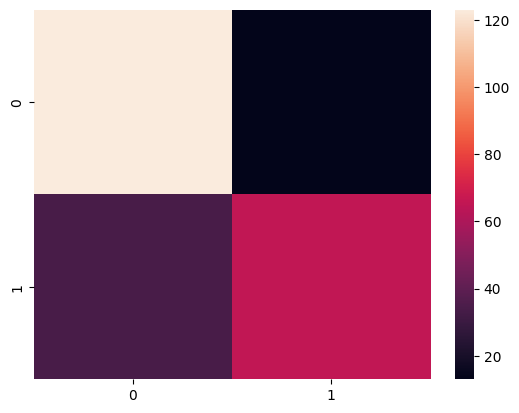

In [104]:
sns.heatmap(cf_KNN);

In [110]:
cf_tree

array([[136,   0],
       [  0,  99]], dtype=int64)

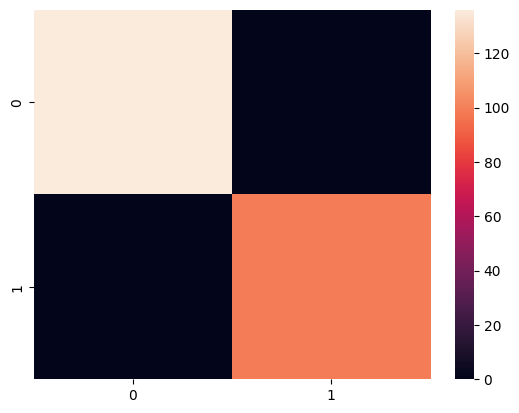

In [105]:
sns.heatmap(cf_tree);

In [111]:
cf_clflog

array([[110,  26],
       [ 49,  50]], dtype=int64)

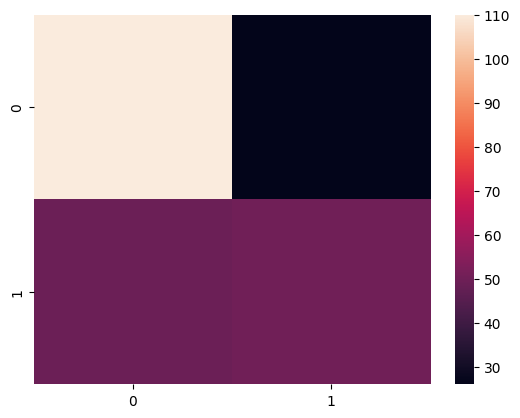

In [106]:
sns.heatmap(cf_clflog);

Muitas métricas são bastante utilizadas para entender os dados da matriz de confusão, duas métricas usadas aqui são:

- Acurácia
- Precisão: relação entre os valores positivos, ou seja, de quantos valores positivos eu acertei;
- Recall_score: dos valores positivos, quais eu achei positivo


In [107]:
# Importando a função
from sklearn.metrics import accuracy_score

# Usando a função para obter a acurácia
acc_KNN = accuracy_score(y_test, pred_KNN)
acc_tree = accuracy_score(y_test, pred_tree)
acc_clflog = accuracy_score(y_test, pred_clflog)

# Mostrando o resultado na tela
print(acc_KNN)
print(acc_tree)
print(acc_clflog)

0.8
1.0
0.6808510638297872


In [108]:
# Verificando a precisão dos dados
from sklearn.metrics import precision_score
# Usando a função para obter a precisão
acc_KNN = precision_score(y_test, pred_KNN)
acc_tree = precision_score(y_test, pred_tree)
acc_clflog = precision_score(y_test, pred_clflog)

# Mostrando o resultado na tela
print(acc_KNN)
print(acc_tree)
print(acc_clflog)

0.8333333333333334
1.0
0.6578947368421053


In [112]:
# Verificado o recall_score dos dados
from sklearn.metrics import recall_score
# Usando a função para obter o recall_score
acc_KNN = recall_score(y_test, pred_KNN)
acc_tree = recall_score(y_test, pred_tree)
acc_clflog = recall_score(y_test, pred_clflog)

# Mostrando o resultado na tela
print(acc_KNN)
print(acc_tree)
print(acc_clflog)

0.6565656565656566
1.0
0.5050505050505051


# Tratamento de dados

Ao invés de apenas excluir os dados irrelevantes ou que estão faltando, será feito um tratamento de dados para que alguns destes possam ser usados no dataset.

In [109]:
# importando as bibliotecas
import pandas as pd

In [110]:
# Carregando o dataset
dataset = pd.read_csv("Titanic/train.csv")

In [111]:
dataset.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [112]:
# Removendo colunas com alta cardinalidade
dataset.drop(["PassengerId", "Name"], axis=1, inplace=True)

In [113]:
# Removendo a coluna Cabin, devido a alta cardinalidade e valores vazios
dataset.drop("Cabin", axis=1, inplace=True)

In [114]:
# Substituindo as linhas vazias da idade pela média das idades
dataset.loc[dataset.Age.isnull(), 'Age'] = dataset["Age"].mean()

In [115]:
# Eliminando demais linhas vazias do dataset
dataset.dropna(inplace=True)

In [116]:
# Criando uma nova coluna para verificar se é homem ou não
dataset["IsMale"] = dataset.Sex.apply(lambda x: 1 if x== "male" else 0)


In [117]:
# Removendo colunas com dtypes do tipo object
colunas = dataset.dtypes[dataset.dtypes == "object"].index

dataset.drop(colunas, axis=1, inplace=True)

In [118]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,IsMale
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [119]:
# Separado os conjutos de dados
X = dataset.drop("Survived", axis=1)
y = dataset.Survived

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [120]:
# Criando os classificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

knn = KNeighborsClassifier(n_neighbors=3)
clf_tree = tree.DecisionTreeClassifier(random_state=0)
clf_log = LogisticRegression(random_state=0, max_iter=1000)

In [121]:
# realizando os treinamentos
knn =knn.fit(X_train, y_train)
clf_tree =clf_tree.fit(X_train, y_train)
clf_log = clf_log.fit(X_train, y_train)

In [122]:
# Fazendo predição
pred_knn = knn.predict(X_test)
pred_clf_tree = clf_tree.predict(X_test)
pred_clf_log = clf_log.predict(X_test)

In [123]:
# Avaliando as métricas de cada modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [124]:
predicts = [pred_knn, pred_clf_log, pred_clf_log]
metrics = [accuracy_score, precision_score, recall_score]

for pred in predicts:
    for metric in metrics:
        print(metric(y_test, pred))
    
    print()


0.6972789115646258
0.6206896551724138
0.4909090909090909

0.8061224489795918
0.7304347826086957
0.7636363636363637

0.8061224489795918
0.7304347826086957
0.7636363636363637

